In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('OxCGRT_USA_differentiated_withnotes_2020.csv') # using the raw file

/var/folders/dz/tj66_wfj2r3gmc0tvbrd3yfw0000gn/T/ipykernel_61004/3945756728.py:1: DtypeWarning: Columns (82,93,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('OxCGRT_USA_differentiated_withnotes_2020.csv')


In [26]:
df.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_NonVaccinated_ForDisplay,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_Vaccinated_ForDisplay,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_SimpleAverage_ForDisplay,ContainmentHealthIndex_WeightedAverage,ContainmentHealthIndex_WeightedAverage_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay
0,United States,USA,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,United States,USA,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,United States,USA,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,United States,USA,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,United States,USA,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1E_School closing', 'C1E_Flag',
       'C1NV_School closing', 'C1NV_Flag',
       ...
       'ContainmentHealthIndex_NonVaccinated',
       'ContainmentHealthIndex_NonVaccinated_ForDisplay',
       'ContainmentHealthIndex_Vaccinated',
       'ContainmentHealthIndex_Vaccinated_ForDisplay',
       'ContainmentHealthIndex_SimpleAverage',
       'ContainmentHealthIndex_SimpleAverage_ForDisplay',
       'ContainmentHealthIndex_WeightedAverage',
       'ContainmentHealthIndex_WeightedAverage_ForDisplay',
       'EconomicSupportIndex', 'EconomicSupportIndex_ForDisplay'],
      dtype='object', length=160)

In [28]:
variables_C = [
    'C1M_School closing', 'C2E_Workplace closing', 'C2M_Workplace closing',
    'C3E_Cancel public events', 'C3M_Cancel public events',
    'C4E_Restrictions on gatherings', 'C4M_Restrictions on gatherings',
    'C5E_Close public transport', 'C5M_Close public transport',
    'C6E_Stay at home requirements', 'C6M_Stay at home requirements',
    'C7E_Restrictions on internal movement', 'C7M_Restrictions on internal movement',
    'C8E_International travel controls', 'C8EV_International travel controls'
]

In [29]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

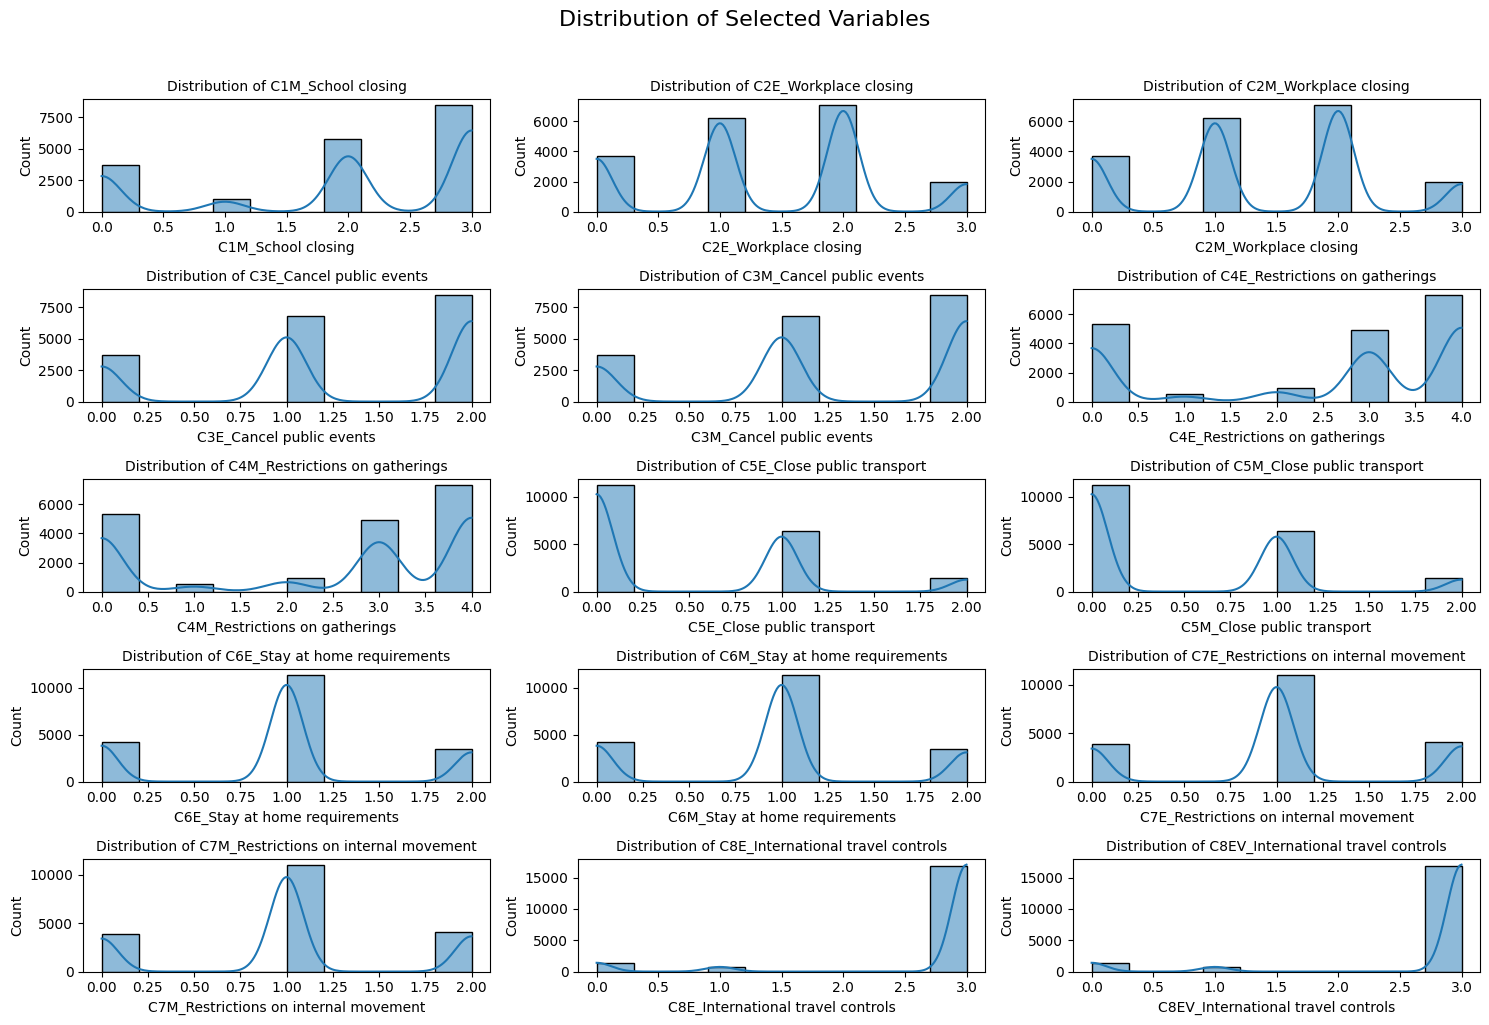

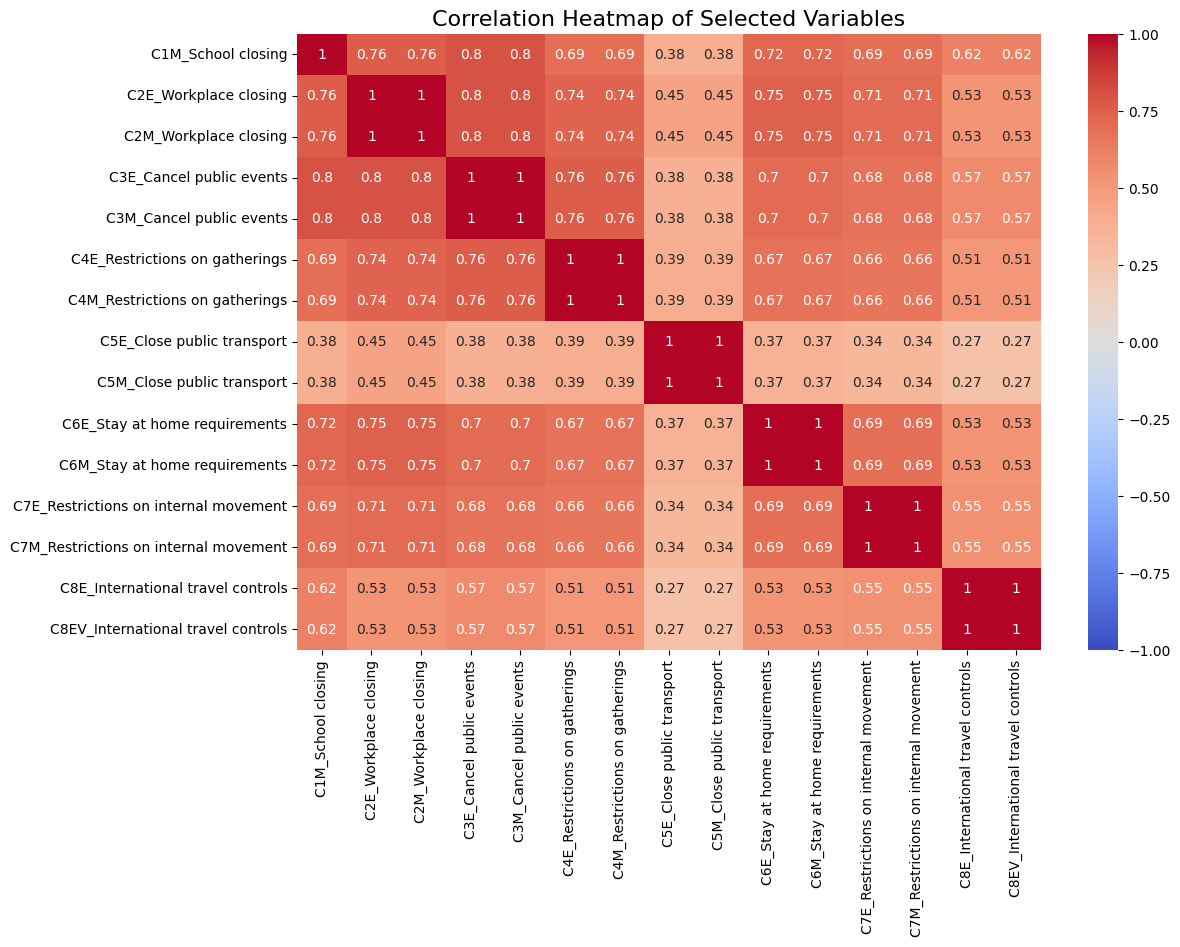

In [30]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_C, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[var].dropna(), bins=10, kde=True)
    plt.xlabel(var)
    plt.title(f'Distribution of {var}', fontsize=10)
    plt.tight_layout()

plt.suptitle('Distribution of Selected Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

correlation_matrix = df[variables_C].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Variables', fontsize=16)
plt.show()

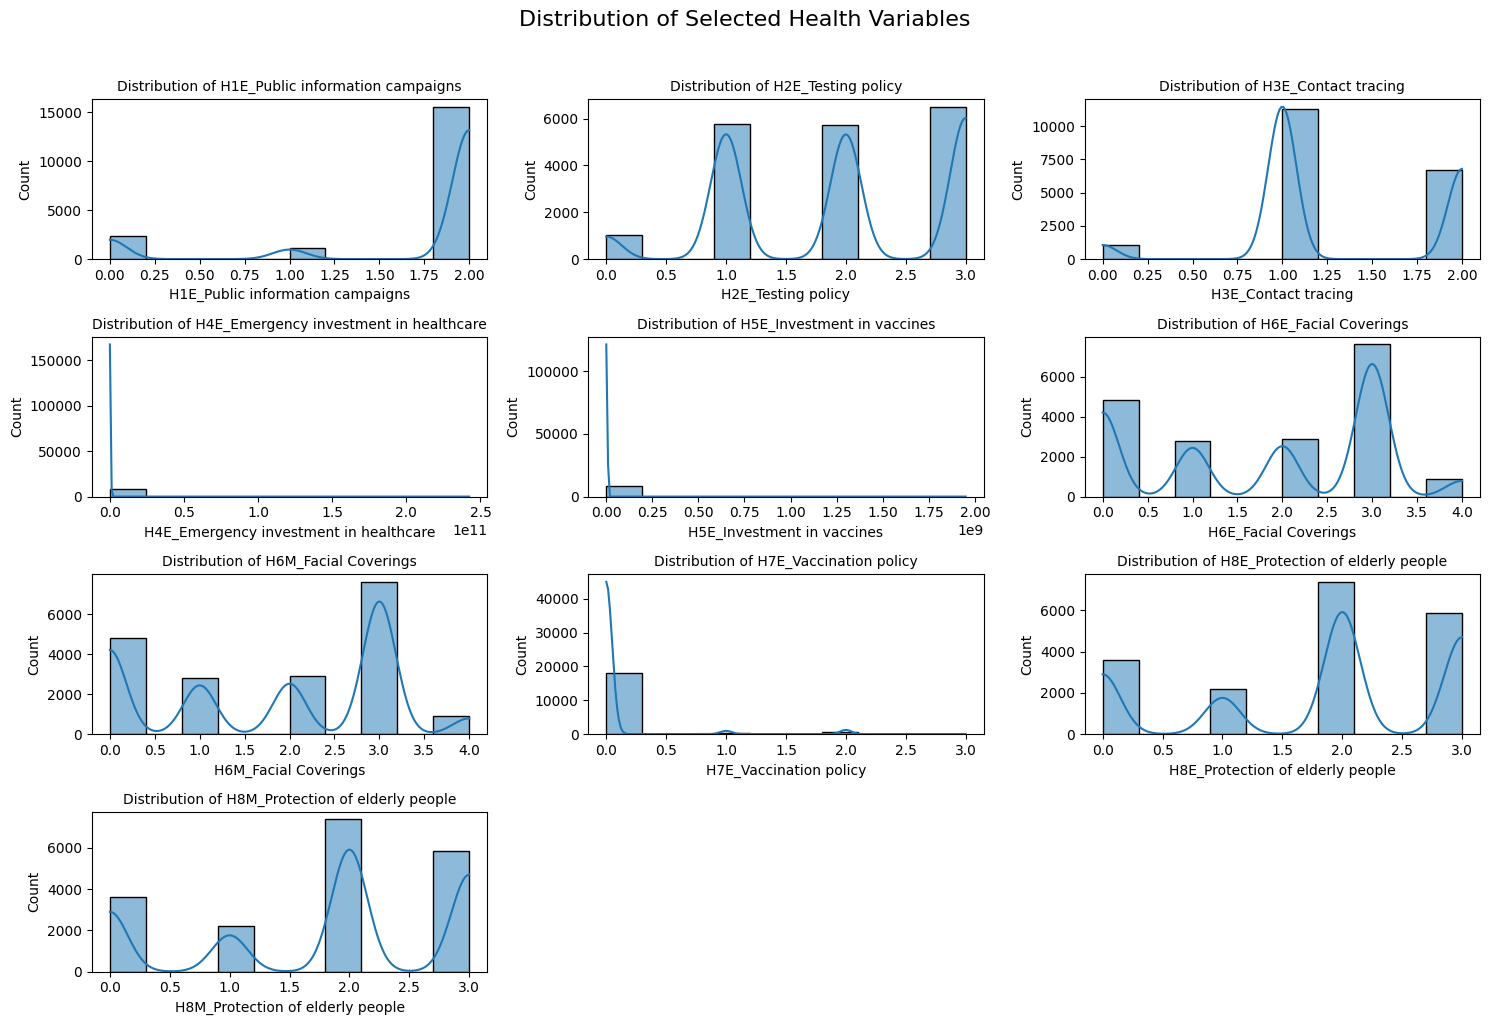

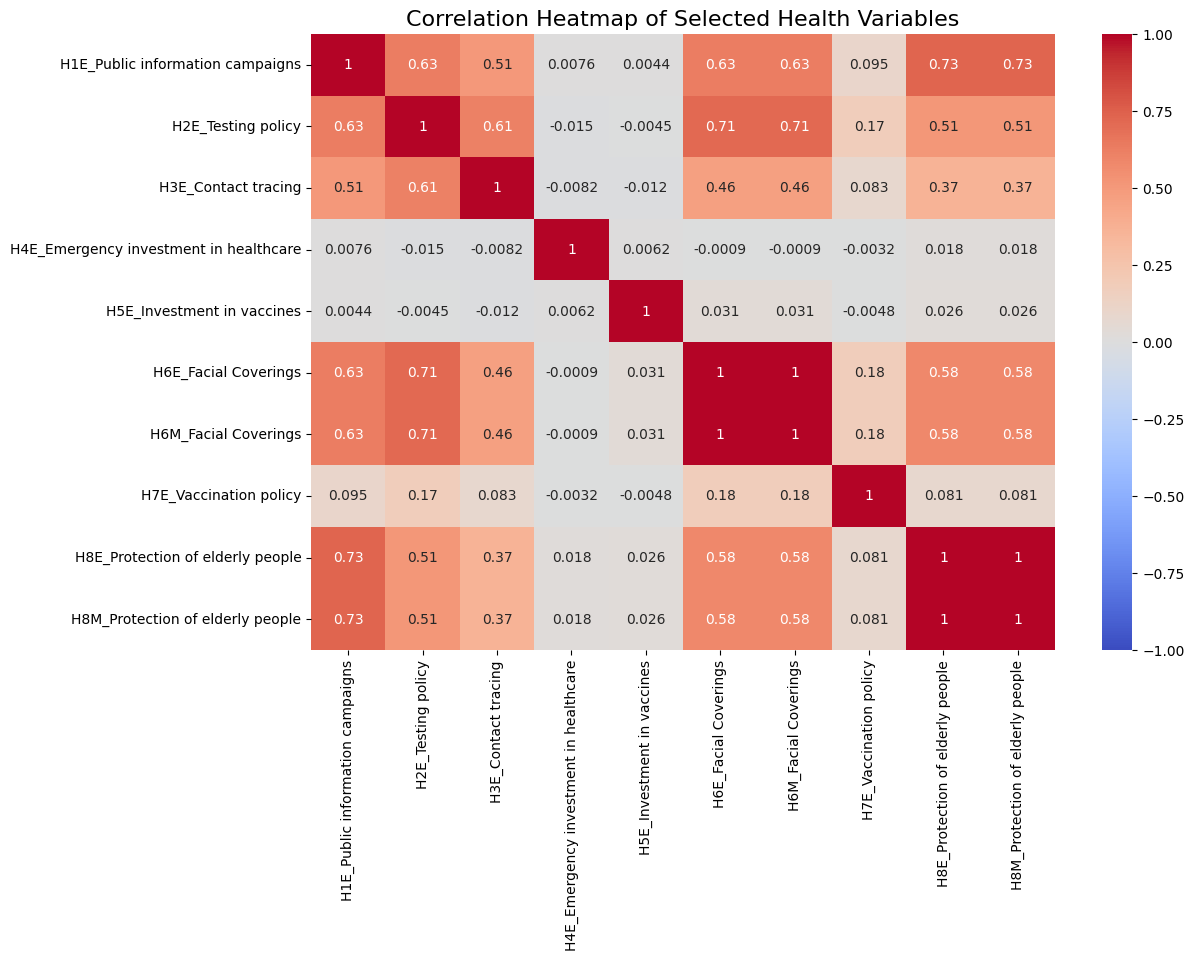

In [31]:
variables_H = [
    'H1E_Public information campaigns', 'H2E_Testing policy', 'H3E_Contact tracing',
    'H4E_Emergency investment in healthcare', 'H5E_Investment in vaccines',
    'H6E_Facial Coverings', 'H6M_Facial Coverings', 'H7E_Vaccination policy',
    'H8E_Protection of elderly people', 'H8M_Protection of elderly people'
]

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_H, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[var].dropna(), bins=10, kde=True)
    plt.xlabel(var)
    plt.title(f'Distribution of {var}', fontsize=10)
    plt.tight_layout()

plt.suptitle('Distribution of Selected Health Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

health_corr_matrix = df[variables_H].corr()

sns.heatmap(health_corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Health Variables', fontsize=16)
plt.show()

In [32]:
variables_E = [
    'E1E_Income support', 'E2E_Debt/contract relief', 
    'E3E_Fiscal measures', 'E4E_International support'
]

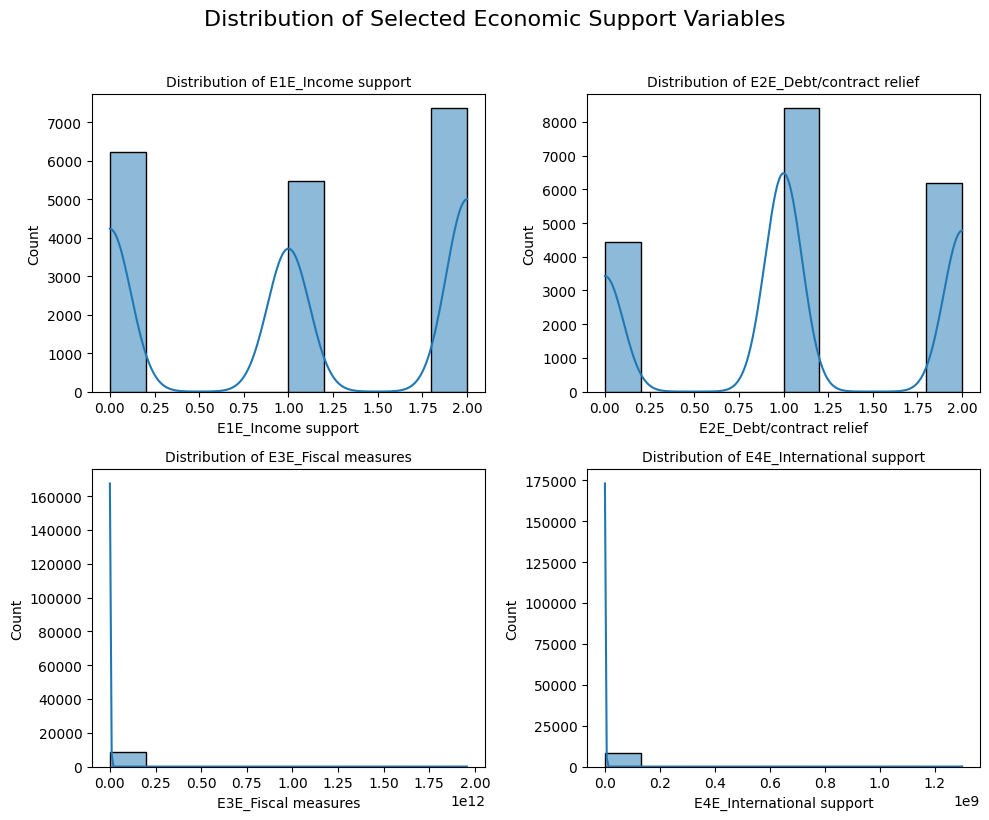

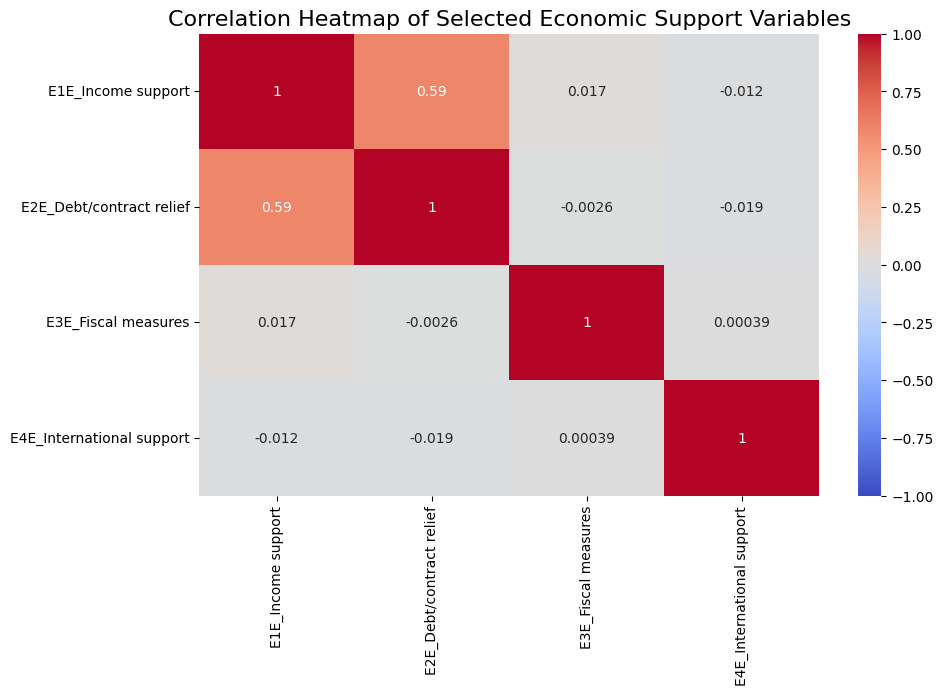

In [33]:
plt.figure(figsize=(10, 8))

for i, var in enumerate(variables_E, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[var].dropna(), bins=10, kde=True)
    plt.xlabel(var)
    plt.title(f'Distribution of {var}', fontsize=10)
    plt.tight_layout()

plt.suptitle('Distribution of Selected Economic Support Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

economic_corr_matrix = df[variables_E].corr()

sns.heatmap(economic_corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Economic Support Variables', fontsize=16)
plt.show()

In [34]:
variables_all = variables_C + variables_H + variables_E

In [35]:
variables_all

['C1M_School closing',
 'C2E_Workplace closing',
 'C2M_Workplace closing',
 'C3E_Cancel public events',
 'C3M_Cancel public events',
 'C4E_Restrictions on gatherings',
 'C4M_Restrictions on gatherings',
 'C5E_Close public transport',
 'C5M_Close public transport',
 'C6E_Stay at home requirements',
 'C6M_Stay at home requirements',
 'C7E_Restrictions on internal movement',
 'C7M_Restrictions on internal movement',
 'C8E_International travel controls',
 'C8EV_International travel controls',
 'H1E_Public information campaigns',
 'H2E_Testing policy',
 'H3E_Contact tracing',
 'H4E_Emergency investment in healthcare',
 'H5E_Investment in vaccines',
 'H6E_Facial Coverings',
 'H6M_Facial Coverings',
 'H7E_Vaccination policy',
 'H8E_Protection of elderly people',
 'H8M_Protection of elderly people',
 'E1E_Income support',
 'E2E_Debt/contract relief',
 'E3E_Fiscal measures',
 'E4E_International support']

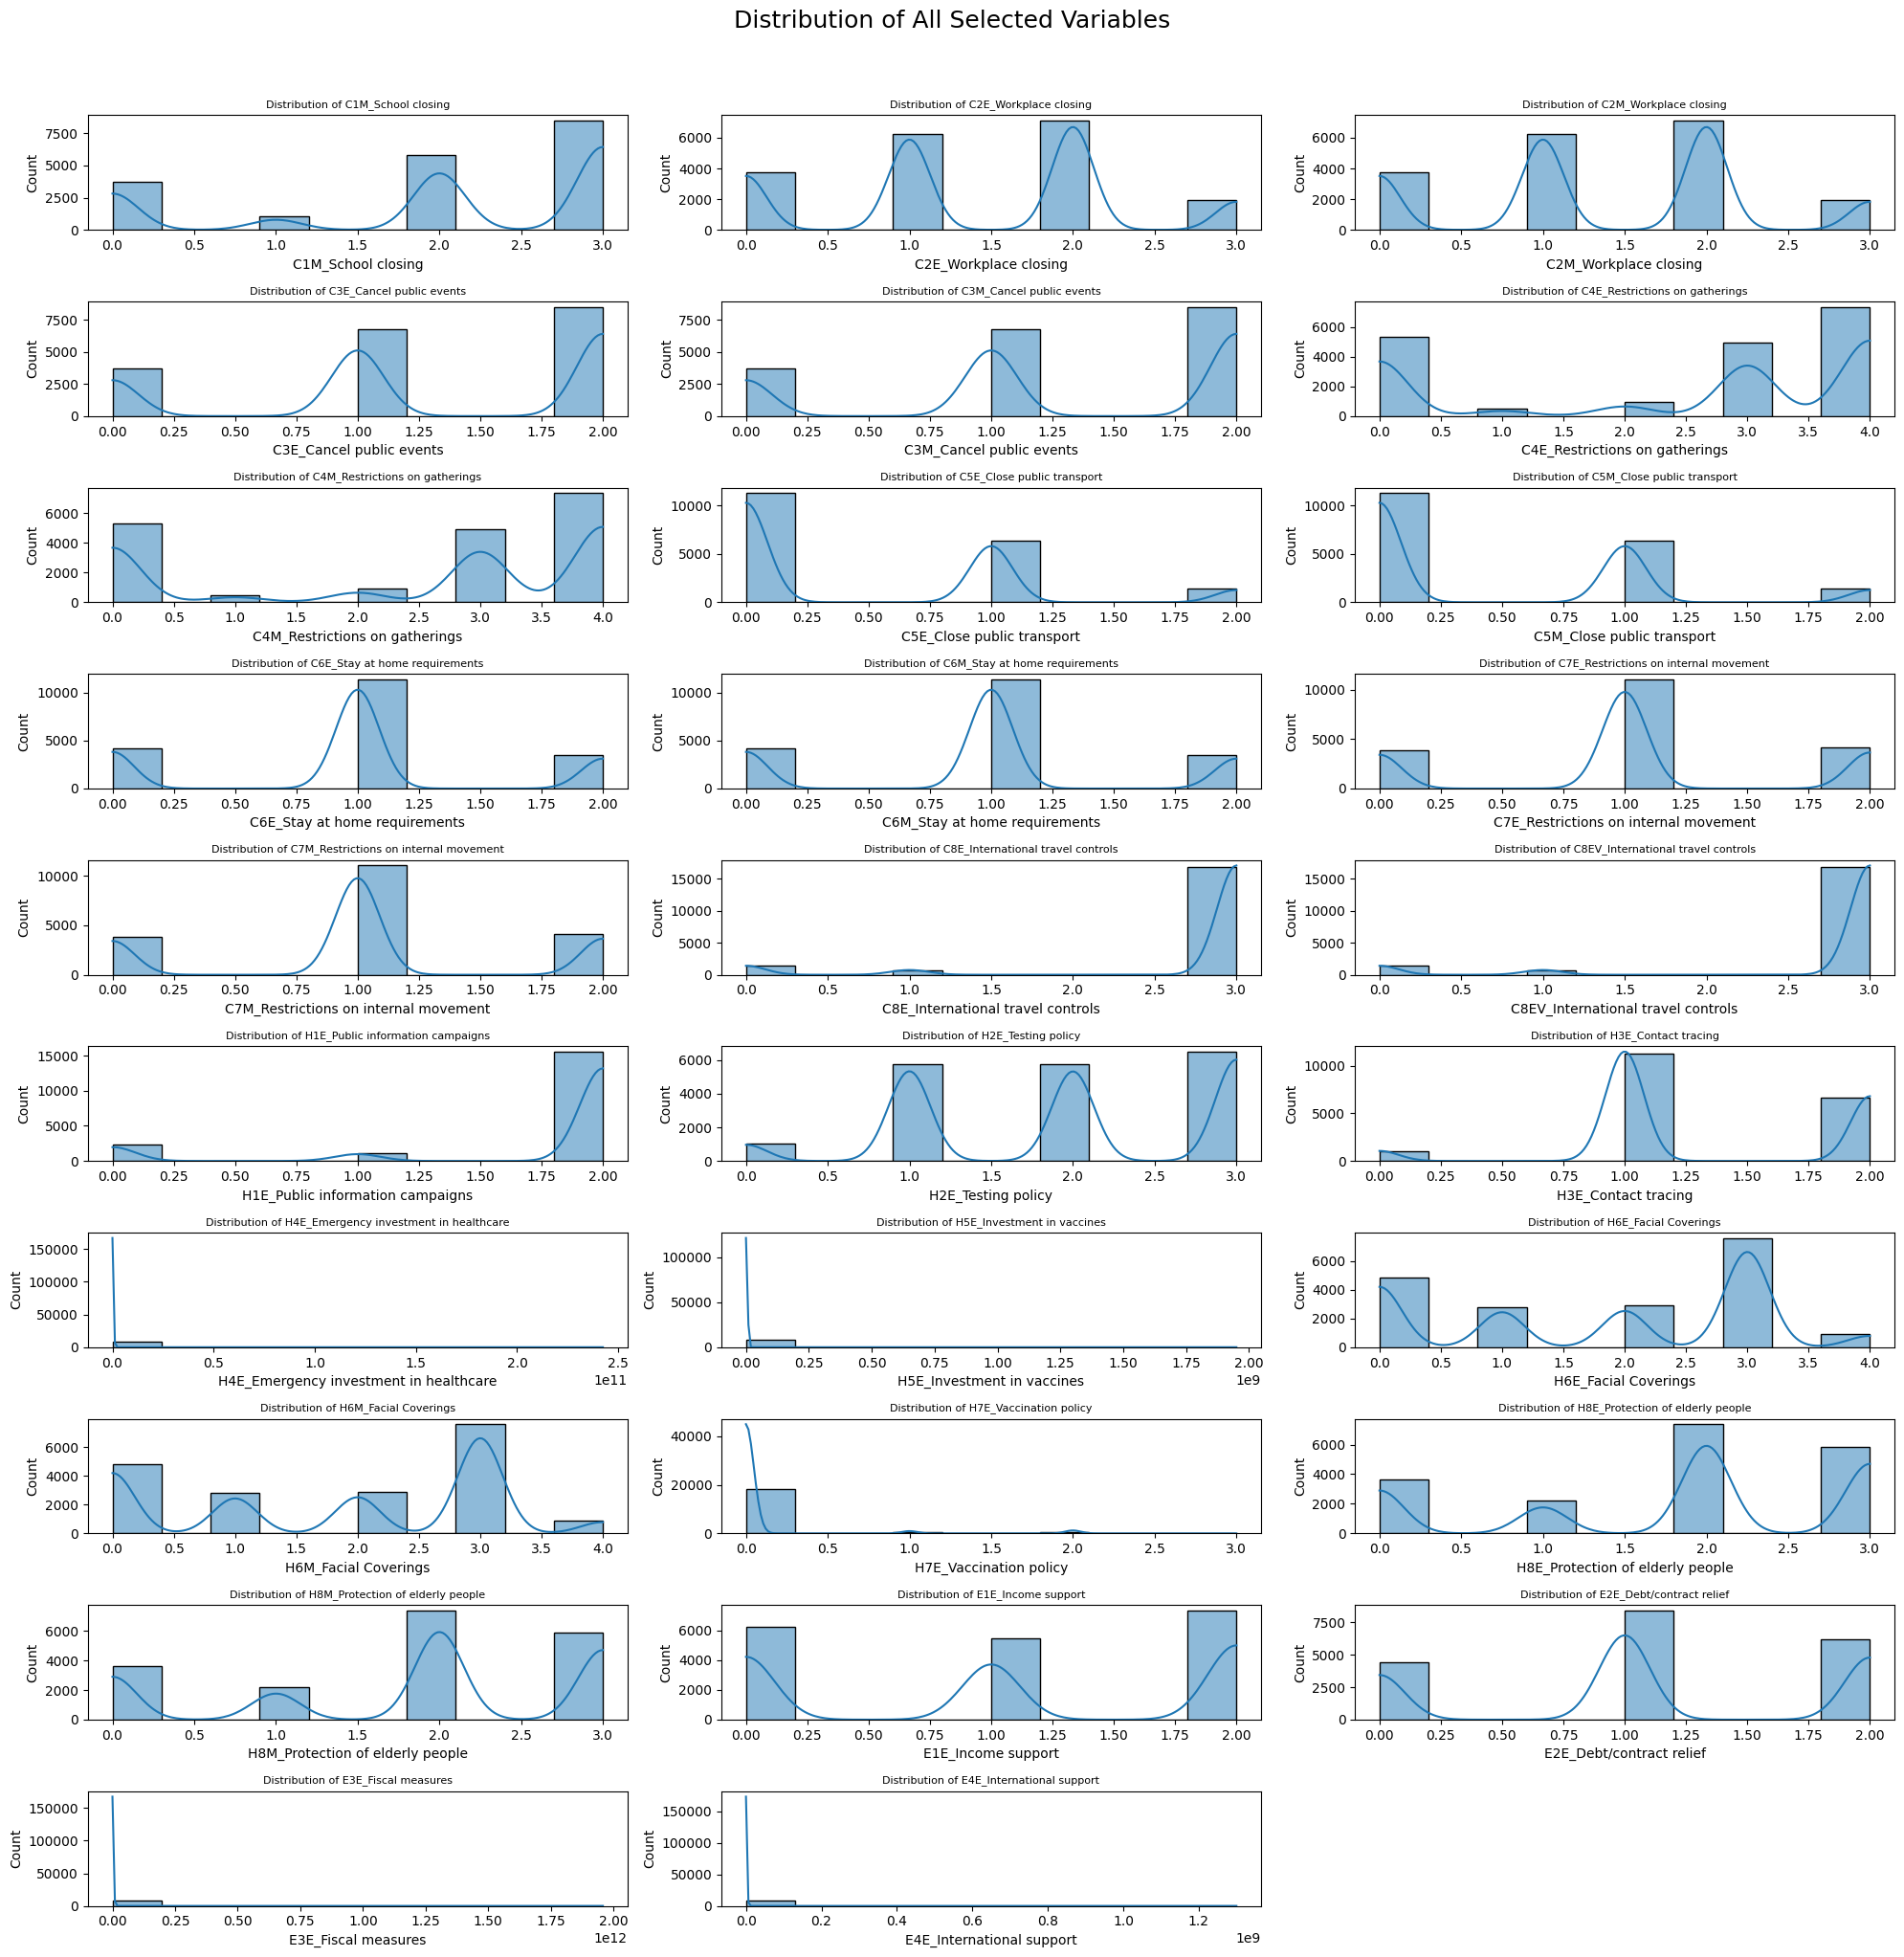

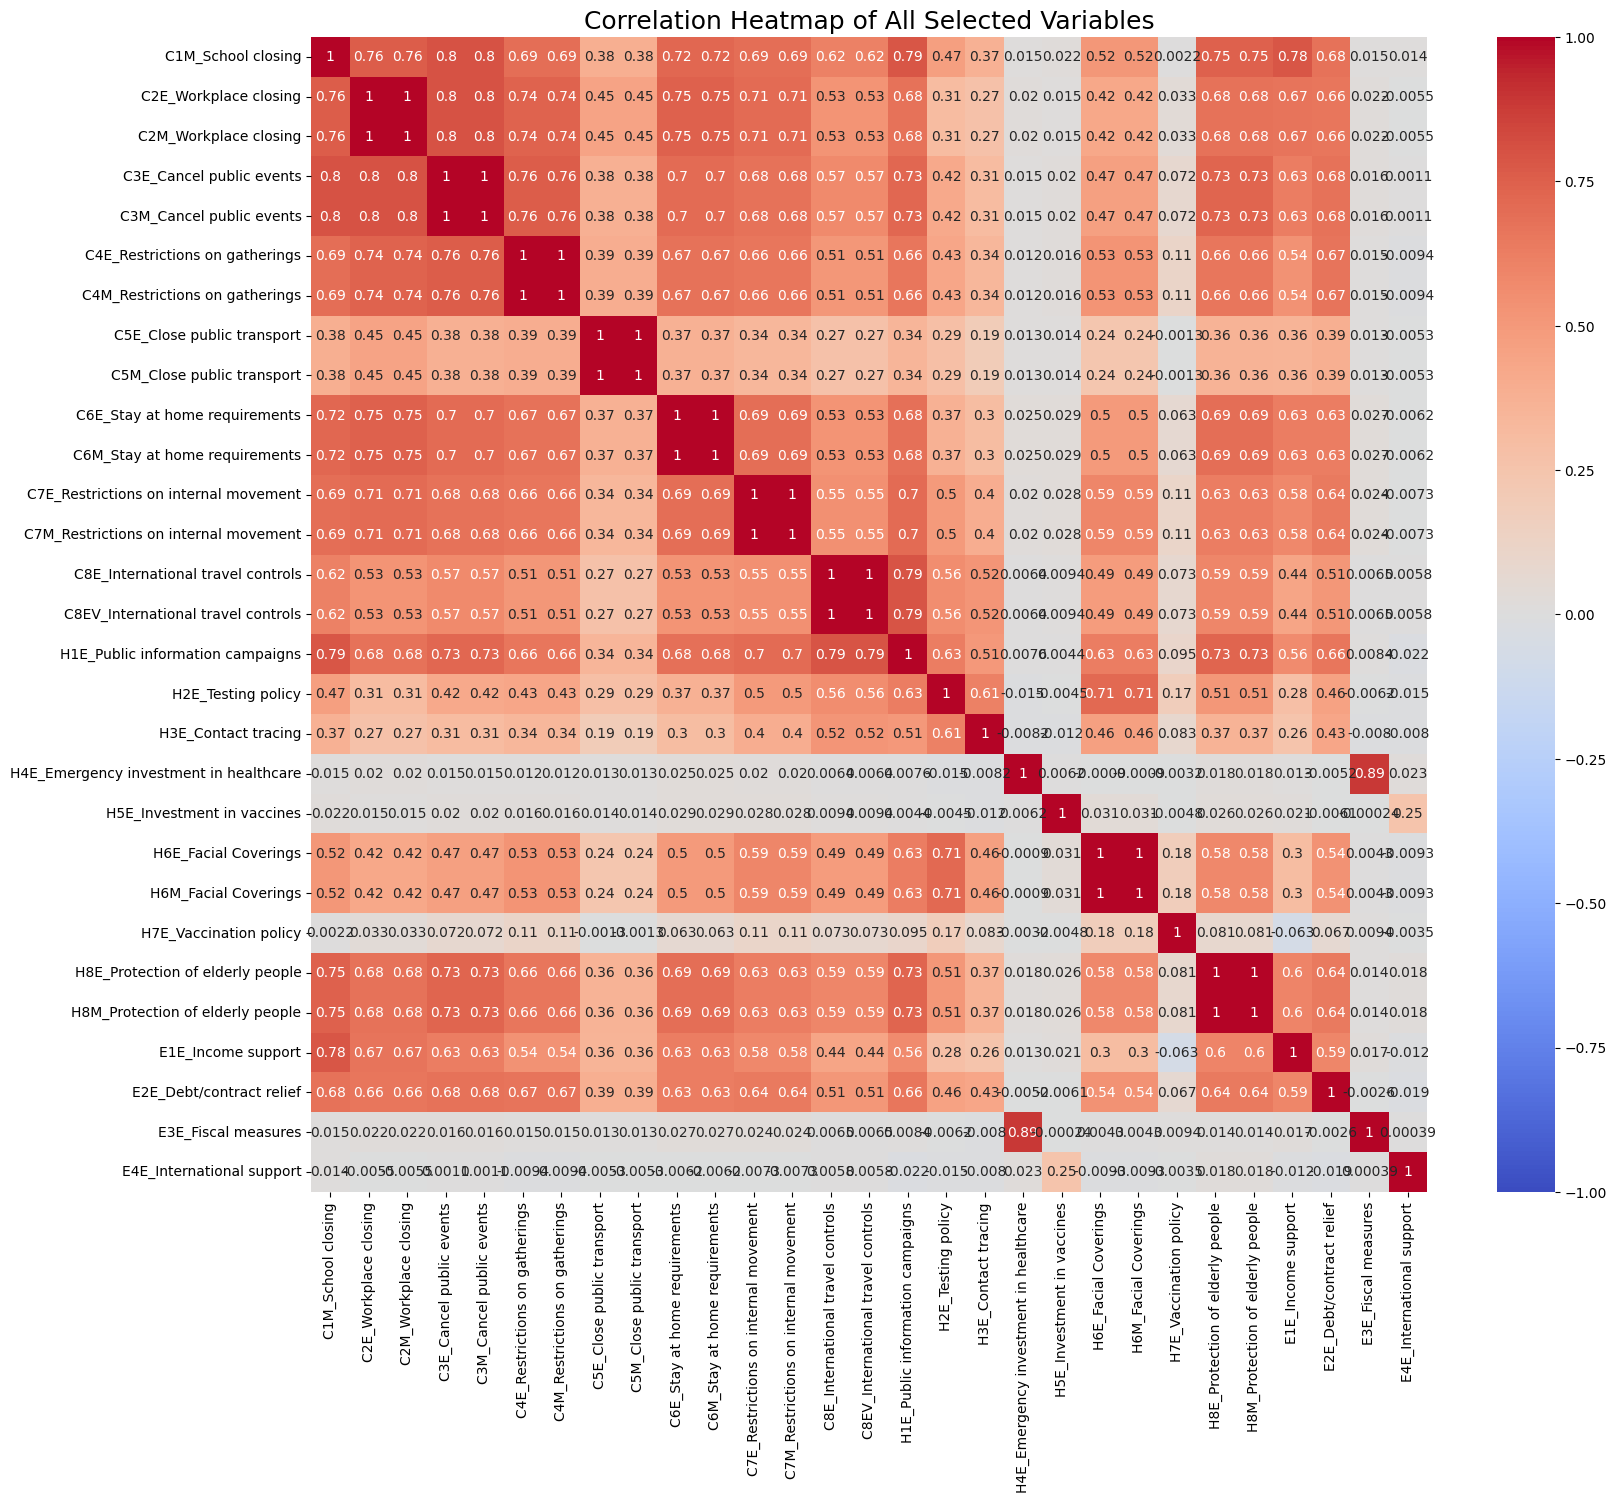

In [36]:
plt.figure(figsize=(20, 20))

for i, var in enumerate(variables_all, 1):
    plt.subplot(10, 3, i)
    sns.histplot(df[var].dropna(), bins=10, kde=True)
    plt.xlabel(var)
    plt.title(f'Distribution of {var}', fontsize=8)
    plt.tight_layout()

plt.suptitle('Distribution of All Selected Variables', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 15))

all_corr_matrix = df[variables_all].corr()

sns.heatmap(all_corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Selected Variables', fontsize=18)
plt.show()